# DIAMOND CUT PREDICTION USING ANN

### Importing required libraries

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sns

### Fetching data from csv file

In [67]:
data = pd.read_csv("diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,bIdeal,bE,bSI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,bPremium,bE,bSI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,bGood,bE,bVS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,bPremium,bI,bVS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,bGood,bJ,bSI2,63.3,58.0,335,4.34,4.35,2.75


In [68]:
d = d = {"bIdeal":0,"bPremium":1,"bGood":2,"bVery Good":3,"bFair":4}

In [69]:
data["cut"] = data["cut"].map(d)

In [70]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,bE,bSI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,bE,bSI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,bE,bVS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,bI,bVS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,bJ,bSI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,bD,bSI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,bD,bSI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,bD,bSI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,bH,bSI2,61.0,58.0,2757,6.15,6.12,3.74


In [71]:
c={"bD":0,"bE":1,"bF":2,"bG":3,"bH":4,"bI":5,"bJ":6}

In [72]:
data["color"] = data["color"].map(c)

In [73]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,bSI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,bSI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,1,bVS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,bVS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,6,bSI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,0,0,bSI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,0,bSI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,0,bSI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,4,bSI2,61.0,58.0,2757,6.15,6.12,3.74


### Dividing features and target

In [74]:
x = data.drop(columns=['cut','clarity'])
y=data.cut

In [75]:
x

,carat,color,depth,table,price,x,y,z
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74


### Splitting train and test data

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Scaling the train and test data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [78]:
y_train_scaled = y_train.to_numpy()
y_test_scaled = y_test.to_numpy()

### Importing DL libraries

In [79]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

### Developing a artificial neural network

In [80]:
model = Sequential()

model.add(Dense(100,activation="relu",input_dim=8))
model.add(Dense(50,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(5,activation="softmax"))

### Training the model with train data

In [81]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [82]:
history=model.fit(x_train_scaled,y_train_scaled,epochs=50,validation_split=0.2)

Epoch 1/50
1079/1079 [==============================] - 7s 6ms/step - loss: 0.8550 - accuracy: 0.6756 - val_loss: 0.7688 - val_accuracy: 0.7041
Epoch 2/50
1079/1079 [==============================] - 3s 2ms/step - loss: 0.7379 - accuracy: 0.7139 - val_loss: 0.7349 - val_accuracy: 0.7212
Epoch 3/50
1079/1079 [==============================] - 3s 3ms/step - loss: 0.7054 - accuracy: 0.7272 - val_loss: 0.6891 - val_accuracy: 0.7437
Epoch 4/50
1079/1079 [==============================] - 3s 3ms/step - loss: 0.6597 - accuracy: 0.7482 - val_loss: 0.7106 - val_accuracy: 0.7201
Epoch 5/50
1079/1079 [==============================] - 3s 2ms/step - loss: 0.6261 - accuracy: 0.7588 - val_loss: 0.6257 - val_accuracy: 0.7696
Epoch 6/50
1079/1079 [==============================] - 3s 2ms/step - loss: 0.6064 - accuracy: 0.7662 - val_loss: 0.6201 - val_accuracy: 0.7607
Epoch 7/50
1079/1079 [==============================] - 3s 3ms/step - loss: 0.5942 - accuracy: 0.7701 - val_loss: 0.6163 - val_accuracy:

In [92]:
number = model.predict(x_test_scaled[[34]]).argmax(axis=1)

1/1 [==============================] - 0s 40ms/step


In [93]:
number

array([1], dtype=int64)

In [94]:
y_test_scaled[34]

1

### Calculating the accuracy

In [98]:
from sklearn.metrics import classification_report

### Plotting the confusion matrix

In [99]:
y_pred = model.predict(x_test_scaled).argmax(axis=1)
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_scaled,y_pred)

338/338 [==============================] - 1s 2ms/step


In [100]:
print(cf)

[[3865  106    8  280    0]
 [ 342 2135    1  312    0]
 [   6    9  700  251   17]
 [ 489  162  114 1670    1]
 [   2    7   51    1  259]]


In [101]:
import seaborn as sns

<AxesSubplot:>

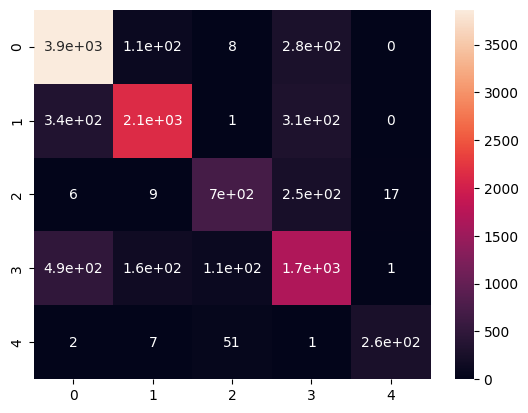

In [102]:
sns.heatmap(cf, annot=True)